# Decenso del Gradiente

In [1]:
#Librerias necesarias
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt

[-1.6920632  -1.10941747] 0.7568184019168283
[-1.52237134 -1.15345089] 0.4489765424938156
[-1.36749033 -1.19519286] 0.19018971906844534
[-1.26136033 -1.22409567] 0.06712669340319936
[-1.19611577 -1.24096464] 0.02069921975940705
[-1.15666835 -1.24967315] 0.003976886604882657
[-1.13249419 -1.25330213] -0.0021619658101367572
[-1.11732611 -1.25382269] -0.004537515679204095
[-1.10751463 -1.25243516] -0.0055550698801077256
[-1.10091711 -1.24986473] -0.006076341642433987
[-1.09625967 -1.2465506 ] -0.006415716178895718
[-1.0927768  -1.24275994] -0.006689696256233955
[-1.09000493 -1.238656  ] -0.006942025907177762
[-1.08766181 -1.23433891] -0.007189329697203079
[-1.08557495 -1.22987038] -0.007438004414673817
[-1.08363871 -1.22528861] -0.007690543635736395
[-1.08178829 -1.22061743] -0.00794792963190356
[-1.07998393 -1.21587188] -0.00821054710905431
[-1.07820125 -1.21106159] -0.008478536365498938
[-1.07642536 -1.20619288] -0.008751931858092773
[-1.07464717 -1.20127009] -0.009030717693057364
[-1.0

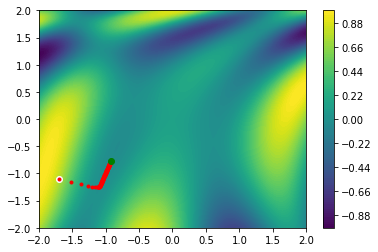

In [6]:
#Hago funcion lambda que representará la funcion de coste hipotética
#Parametros:vector de dos entradas th
func = lambda th: np.sin(1 / 2 * th[0] **2 - 1 / 4 * th[1] ** 2 + 3) * np.cos(2 * th[0] + 1 - np.e ** th[1])

res = 100
#Ejes x e y de -2 a 2 con res=100 divisiones cada uno
_X = np.linspace(-2,2,res)
_Y = np.linspace(-2,2,res)

#matriz de ceros de res x res 
_Z = np.zeros((res,res))

#Relleno la matriz _Z con el valor de la funcion de coste en cada punto (x,y)
for ix, x in enumerate(_X):
    for iy, y in enumerate(_Y):
        _Z[iy,ix] = func([x,y])
        
#Muestra las curvas de nivel de la funcion de coste en [-2,2]
plt.contourf(_X,_Y,_Z,100)
plt.colorbar()
#plt.show() si desea ver hasta aquí

#Genero un punto aleatorio en [-2,2]x[-2,2] para iniciar 
#el decenso del gradiente de la funcion de coste a partir de alli.

#rand(2) genera un arreglo de tamaño 2 con numeros aleatorios del 0 al 1 = [(0,1),(0,1)]
#[(0,1),(0,1)]*4 = [(0,4),(0,4)]
#Ans - 2 = [(-2,2),(-2,2)]
Theta = np.random.rand(2)*4-2  #Este vector jugará el papel del estado inicial de W y b

plt.plot(Theta[0],Theta[1], "o",c="white")
#plt.show() #si desea ver hasta aquí

_T = np.copy(Theta)
h = 0.001  #h para la derivada 
lr = 0.001   #ratio de aprendizaje
grad = np.zeros(2)  #inicializo el vector gradiente en ceros

for _ in range(10000): # num pasos del decenso
    
    for it,th in enumerate(Theta):  #Recorrer las dos entradas del vector Theta y obtener las derivadas parciales del coste
                                    # respecto a esas entradas
        _T = np.copy(Theta)   
        _T[it] = _T[it] + h
        deriv = (func(_T)-func(Theta))/h
        grad[it] = deriv
    
    Theta = Theta -lr*grad #Movernos al punto que tenga menor coste    
    
    if (_%100 ==0):
        plt.plot(Theta[0],Theta[1],".",c="red") #dibujo decenso cada 100 pasos 
        print(Theta,func(Theta)) #imprimo ubicacion del decenso con su respectivo valor de coste
        
plt.plot(Theta[0],Theta[1], "o",c="green") #Dibujo punto final encontrado por el decenso donde hay menor coste
plt.show()